In [49]:
#https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
from sklearn.datasets import load_iris

iris = load_iris()
#I do not know the format
#print iris.target
#print iris.data
print iris.target_names
print iris.feature_names

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
model = RandomForestClassifier(max_depth = 3, n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=703887444, splitter='best')

In [40]:
# No max depth
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(iris.data, iris.target)
estimator_nonlimited = model.estimators_[5]

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, precision = 2, filled = True)


In [42]:
export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, precision = 2, filled = True)


In [43]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

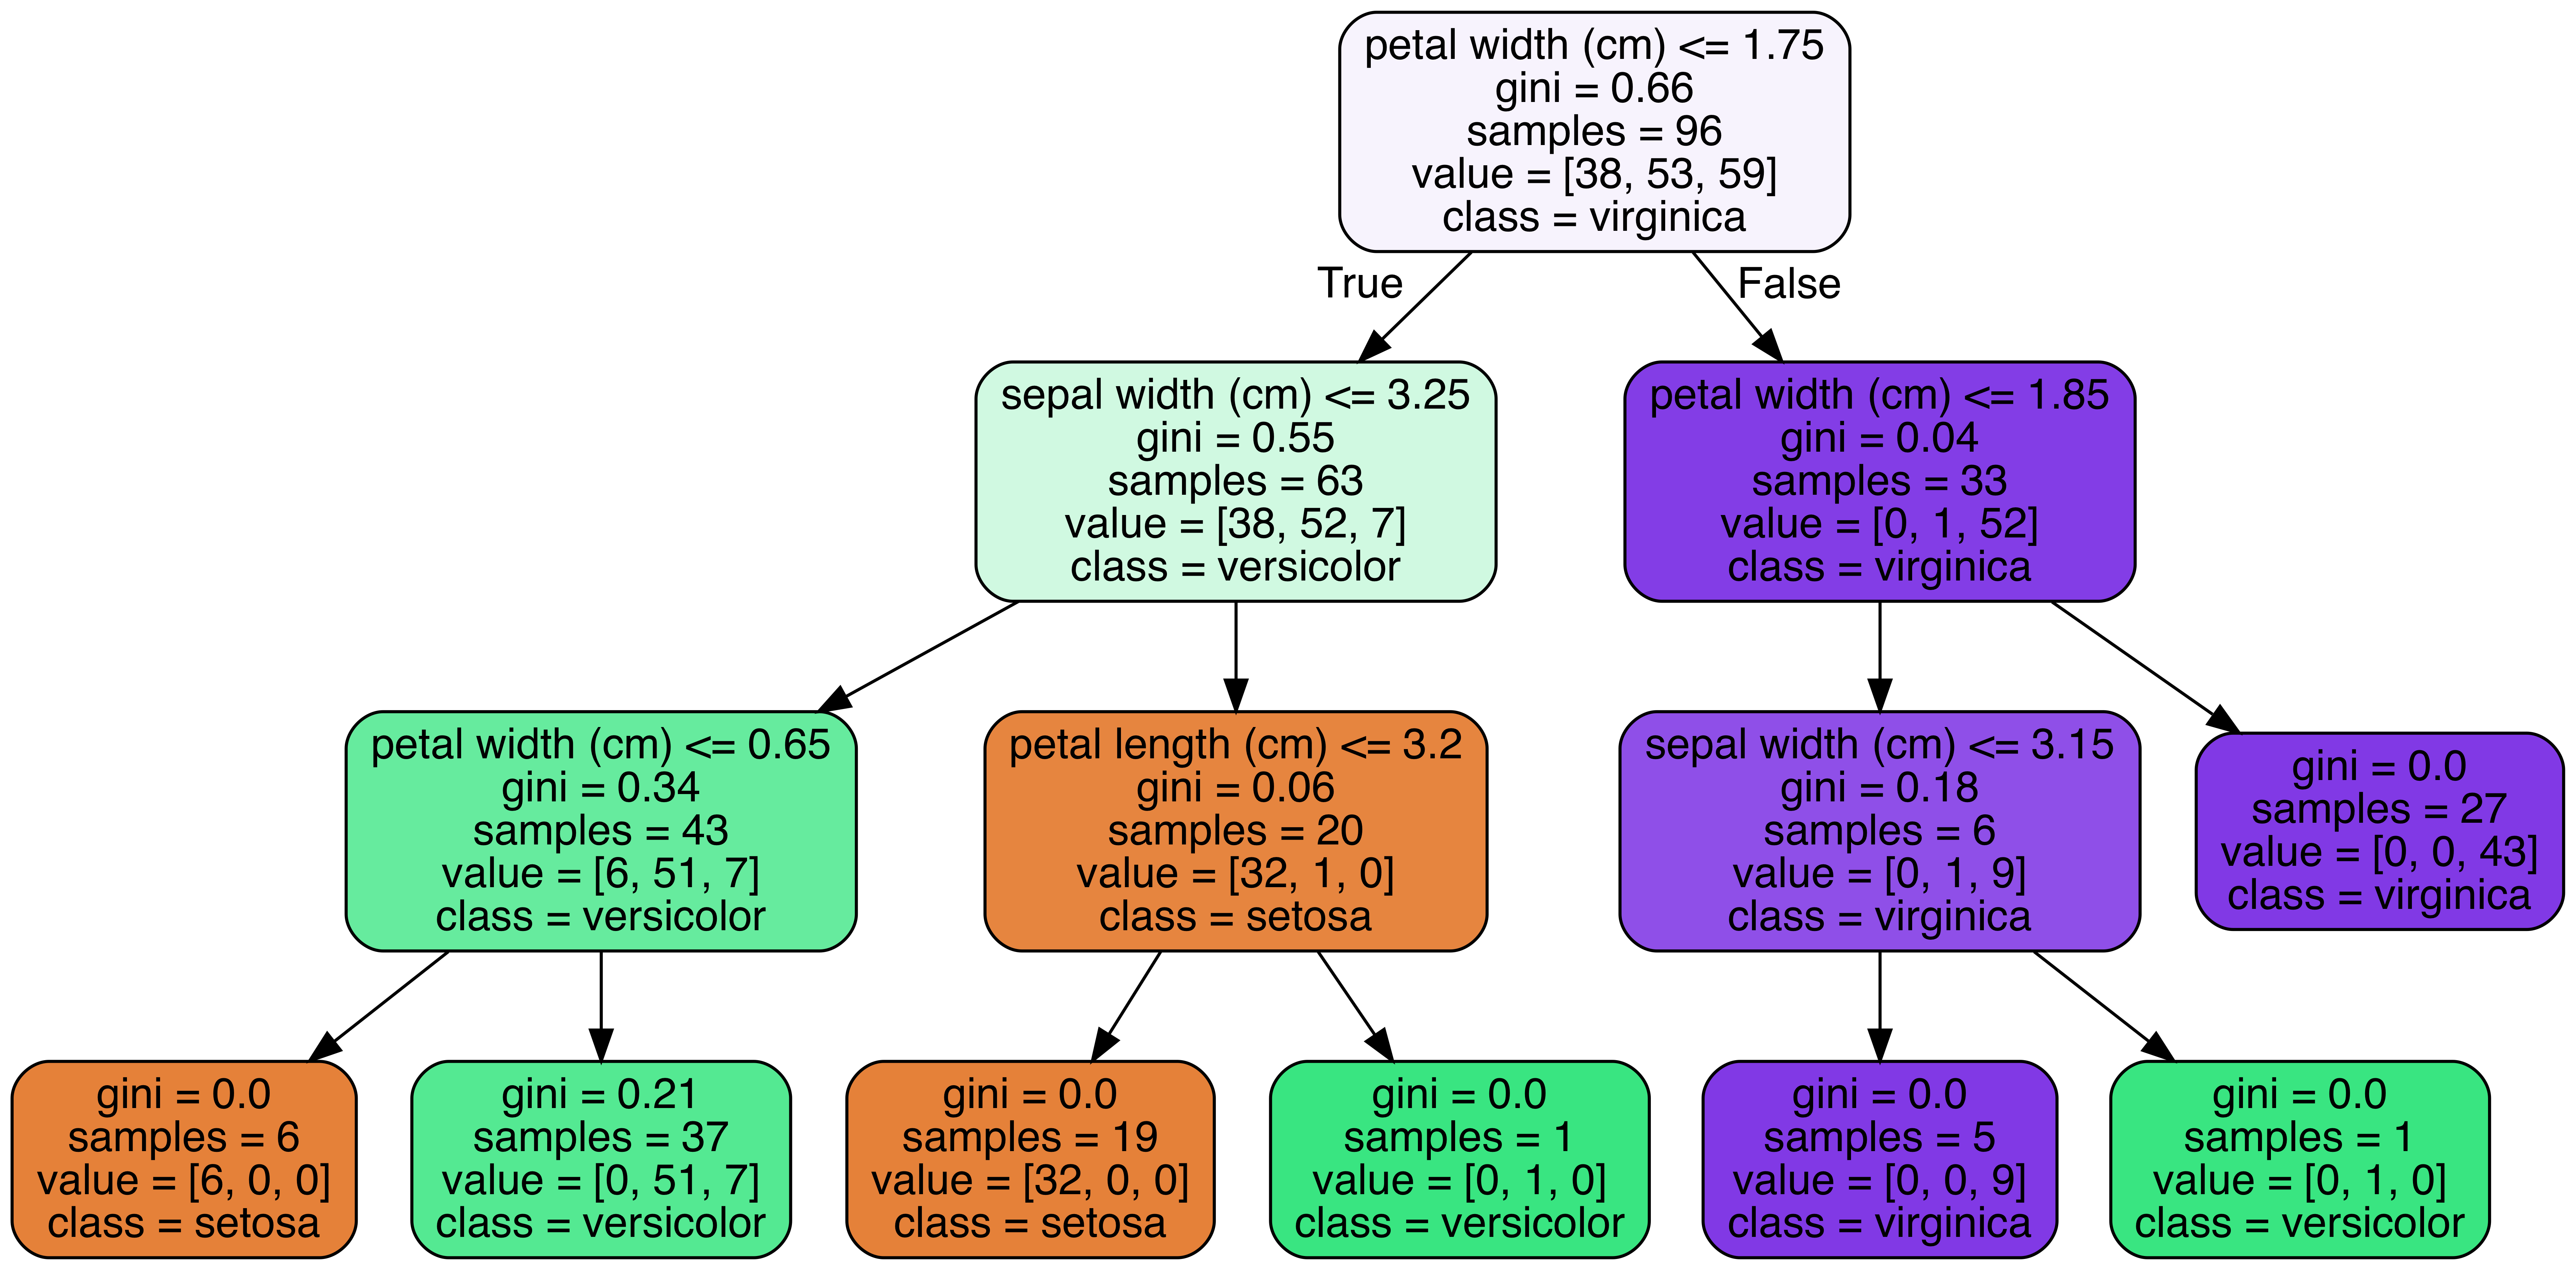

In [44]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [45]:
!dot -Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

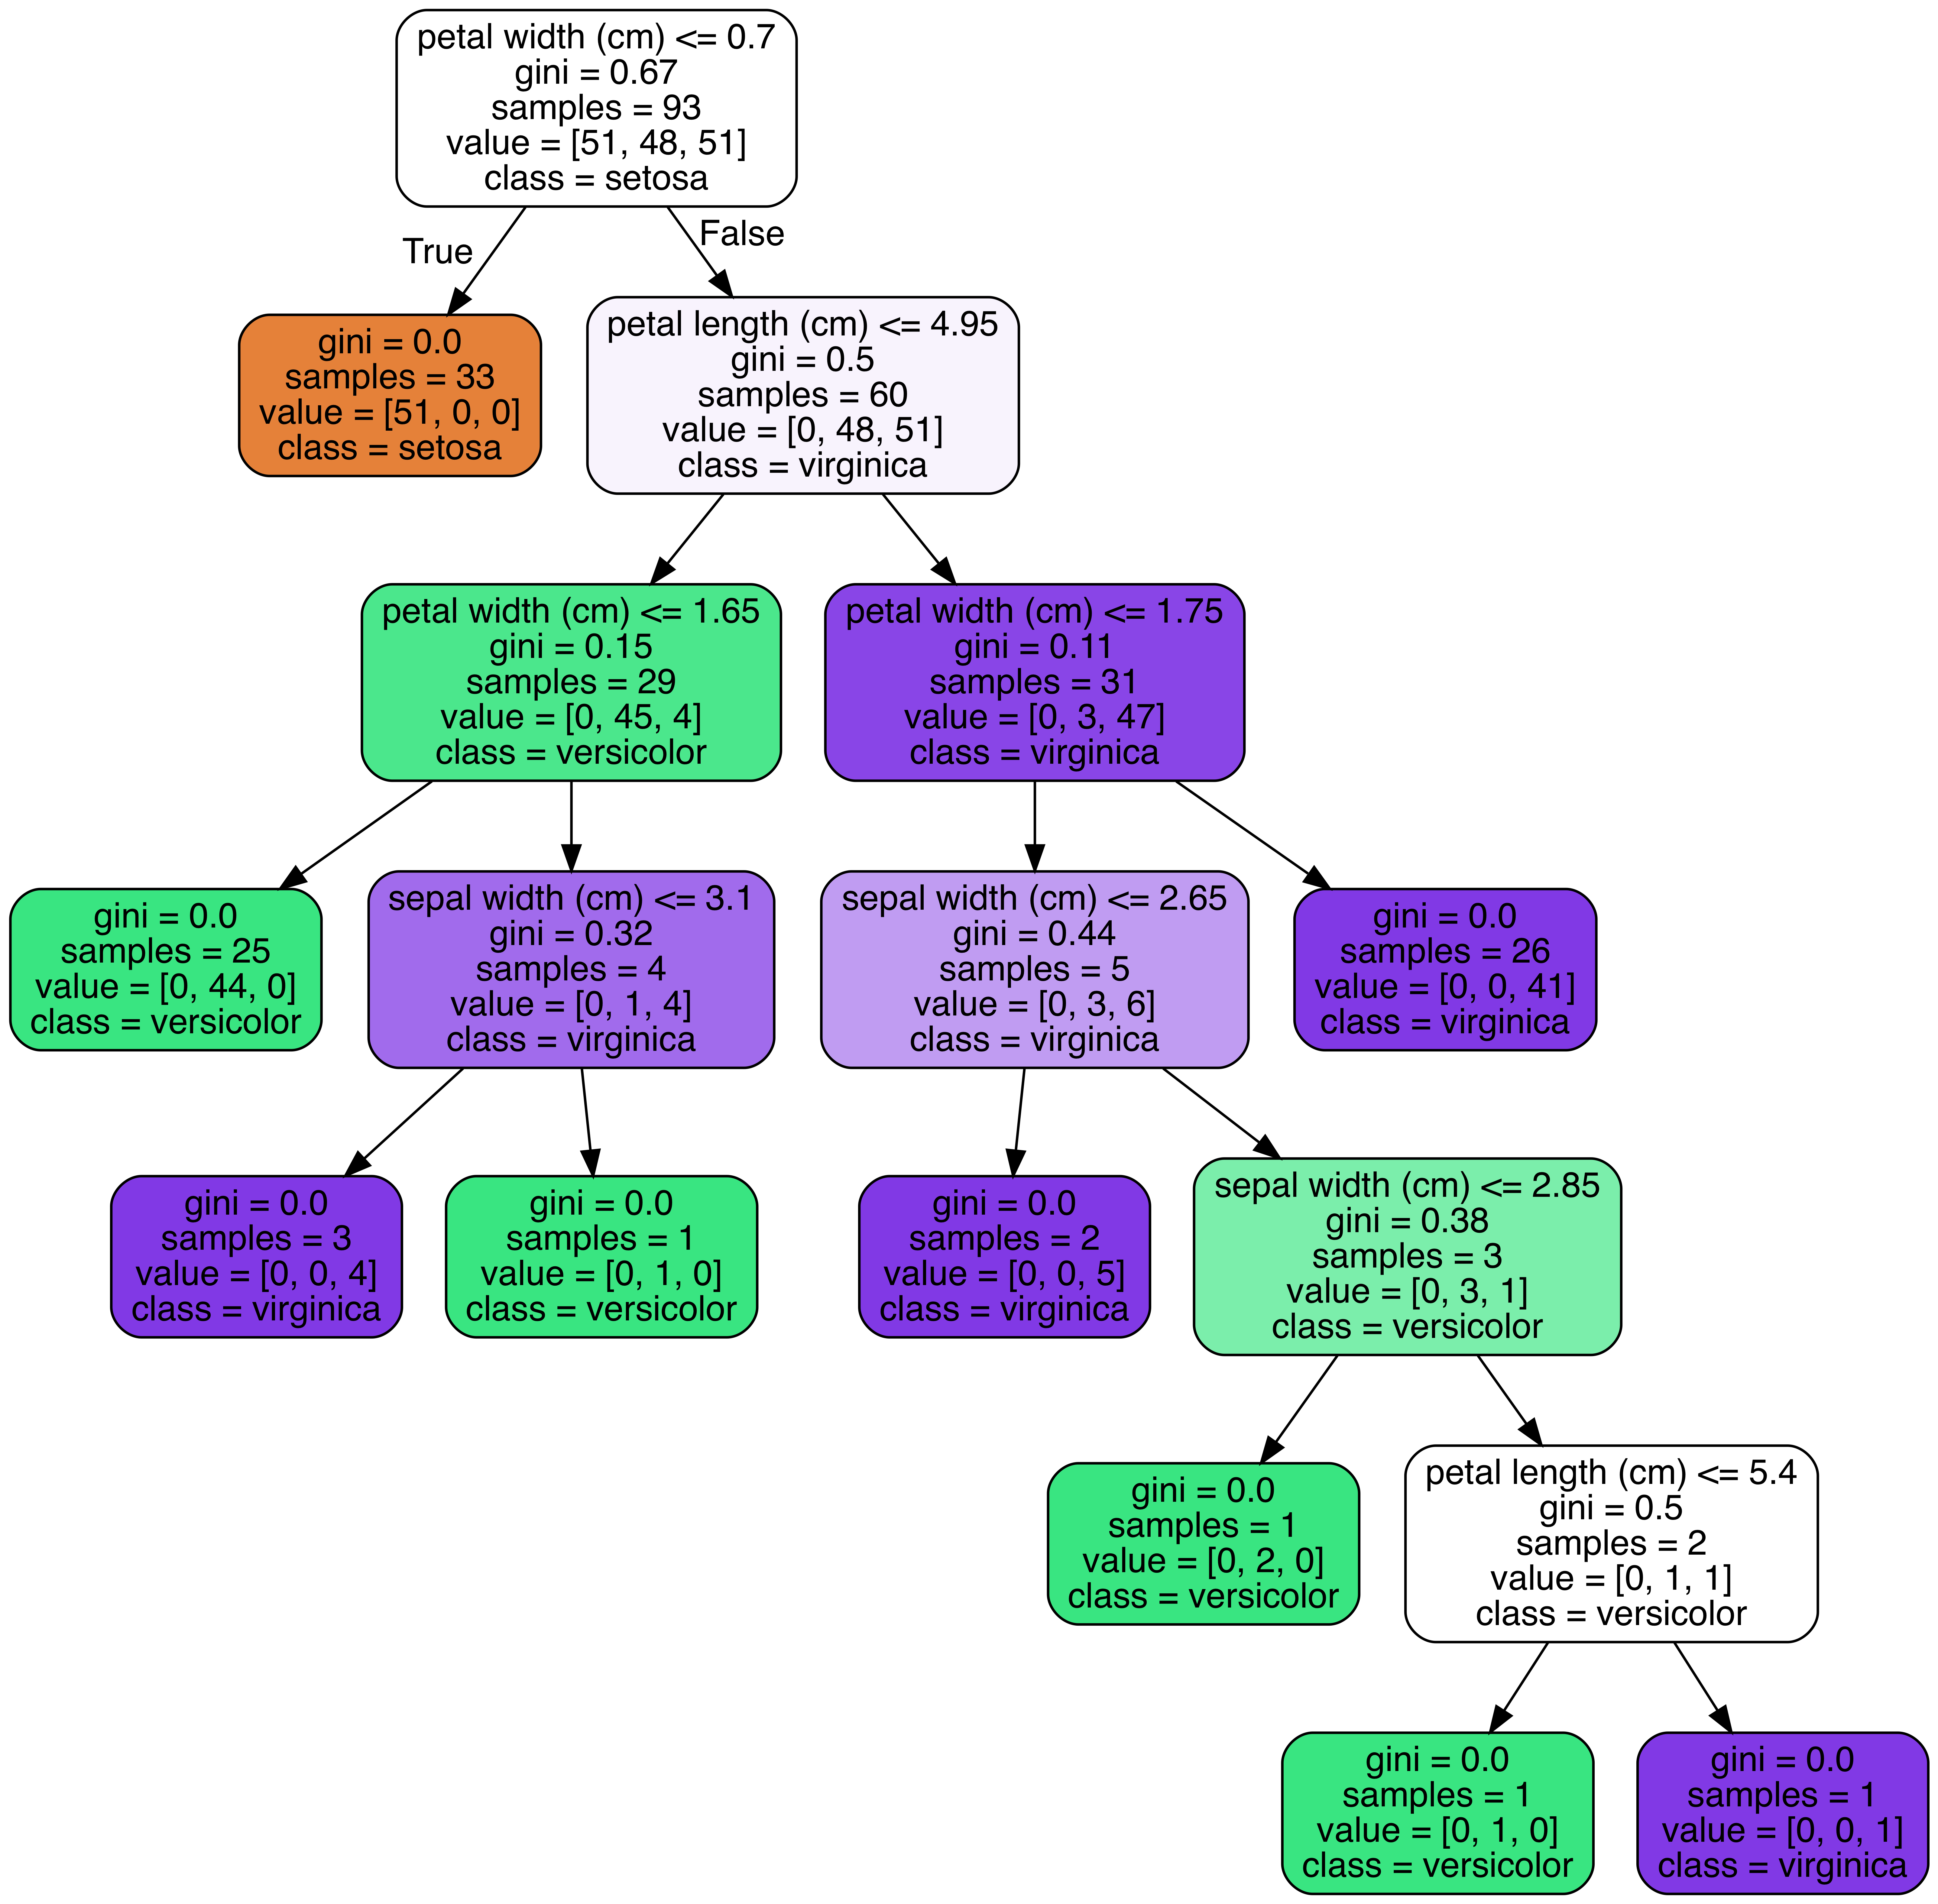

In [46]:
Image(filename = 'tree_nonlimited.png')

In [50]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_nonlimited.dot', '-o', 'tree-test.png', '-Gdpi=600'])

0

In [51]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree-test.png'))
plt.axis('off');
plt.show();

In [1]:
import graphviz

ImportError: No module named graphviz